In [5]:
library(ggplot2)
library(tidyverse)
library(tidyr)
library(dplyr, quietly = T)
library(ggridges)
library(ggrepel)
library(ggbeeswarm)
library(xlsx)
library(ggraph)
library(viridis)
library(igraph)

In [6]:
convert <- function(f){
    as.numeric(gsub(",", "", levels(f)))[f]
}

In [7]:
df.1 <- read.csv('./table_5_offenses_known_offenders_race_and_ethnicity_by_bias_motivation_2015.csv', 
                 skip = 4, header=FALSE, stringsAsFactors = TRUE, dec = '.')
head(df.1)
df.1 <- head(df.1 , -2)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
Bias motivation,Total offenses,Known offender's race,,,,,,,Known offender's ethnicity1,,,,Unknown offender
,,White,Black or African American,American Indian or Alaska Native,Asian,Native Hawaiian or Other Pacific Islander,Group of multiple races,Unknown race,Hispanic or Latino,Not Hispanic or Latino,Group of multiple ethnicities,Unknown ethnicity,
Total,"6,885","2,761","1,129",65,60,7,304,842,182,875,27,"2,158","1,717"
Single-Bias Incidents,"6,837","2,744","1,126",63,60,7,304,840,182,866,27,"2,151","1,693"
Race/Ethnicity/Ancestry:,"4,029","1,833",646,58,41,5,175,391,102,563,5,"1,463",880
Anti-White,734,144,339,17,5,0,26,67,8,114,1,334,136


In [8]:
rownames <- tail(df.1, -2) %>% select(V1)
colnames <- c("bias.motivation", "Total offenses", "White", "Black or African American",
              "American Indian or Alaska Native", "Asian", 
              "Native Hawaiian or Other Pacific Islander", "Group of multiple races",
              "Unknown race", "Hispanic or Latino", "Not Hispanic or Latino", "Group of multiple ethnicities",
              "Unknown ethnicity", "Unknown offender")

tidy_df <- tail(df.1, -2)  %>% mutate_if(is.factor, convert) %>% mutate(V1 = rownames[, 1])
colnames(tidy_df) <- colnames
tidy_df

Warning message in convert(V1):
"в результате преобразования созданы NA"Warning message in convert(V2):
"в результате преобразования созданы NA"Warning message in convert(V3):
"в результате преобразования созданы NA"Warning message in convert(V4):
"в результате преобразования созданы NA"Warning message in convert(V5):
"в результате преобразования созданы NA"Warning message in convert(V6):
"в результате преобразования созданы NA"Warning message in convert(V7):
"в результате преобразования созданы NA"Warning message in convert(V8):
"в результате преобразования созданы NA"Warning message in convert(V9):
"в результате преобразования созданы NA"Warning message in convert(V10):
"в результате преобразования созданы NA"Warning message in convert(V11):
"в результате преобразования созданы NA"Warning message in convert(V12):
"в результате преобразования созданы NA"Warning message in convert(V13):
"в результате преобразования созданы NA"Warning message in convert(V14):
"в результате преобразовани

bias.motivation,Total offenses,White,Black or African American,American Indian or Alaska Native,Asian,Native Hawaiian or Other Pacific Islander,Group of multiple races,Unknown race,Hispanic or Latino,Not Hispanic or Latino,Group of multiple ethnicities,Unknown ethnicity,Unknown offender
Total,6885,2761,1129,65,60,7,304,842,182,875,27,2158,1717
Single-Bias Incidents,6837,2744,1126,63,60,7,304,840,182,866,27,2151,1693
Race/Ethnicity/Ancestry:,4029,1833,646,58,41,5,175,391,102,563,5,1463,880
Anti-White,734,144,339,17,5,0,26,67,8,114,1,334,136
Anti-Black or African American,2125,1227,72,23,22,0,97,202,69,259,4,756,482
Anti-American Indian or Alaska Native,137,37,33,11,1,0,1,9,1,3,0,79,45
Anti-Asian,132,50,32,0,4,0,7,11,0,26,0,26,28
Anti-Native Hawaiian or Other Pacific Islander,6,0,1,0,0,3,0,1,0,3,0,1,1
"Anti-Multiple Races, Group",138,50,11,0,0,0,13,15,9,12,0,45,49
Anti-Arab,47,25,6,0,0,0,0,6,4,8,0,15,10


In [9]:
races <- tidy_df %>% select(-c("Total offenses", "Unknown offender")) %>% select(-c(9, 10, 11, 12)) %>%
filter(bias.motivation == "Race/Ethnicity/Ancestry:" | bias.motivation == "Religion:" |
      bias.motivation == "Sexual Orientation:" | bias.motivation == "Disability:" |
      bias.motivation == "Gender:" | bias.motivation == "Gender Identity:")

races <- data.frame(races[1], stack(races[2:ncol(races)]))
colnames(races)[2:3] <- c('value', 'race')
head(races)

bias.motivation,value,race
Race/Ethnicity/Ancestry:,1833,White
Religion:,346,White
Sexual Orientation:,481,White
Disability:,38,White
Gender:,12,White
Gender Identity:,34,White


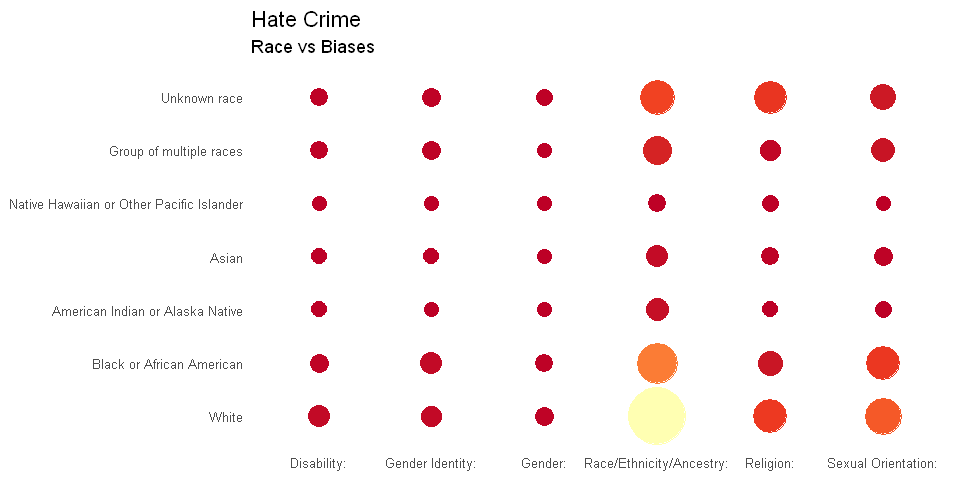

In [10]:
options(repr.plot.width = 8, repr.plot.height = 4)
ggplot(races, aes(x = bias.motivation, color = value, size = value, y = race)) + 
geom_point() + 
scale_size_continuous(range = c(4, 16)) +
scale_color_distiller(palette = 18) +
theme_minimal() +
theme(axis.text = element_text(size = 8), 
      axis.title = element_blank(), 
      legend.position = "none",
      panel.grid = element_blank()) + 
labs(title = "Hate Crime", subtitle = "Race vs Biases")

Adding missing grouping variables: `race`
Warning message:
"The plyr::rename operation has created duplicates for the following name(s): (`alpha`)"

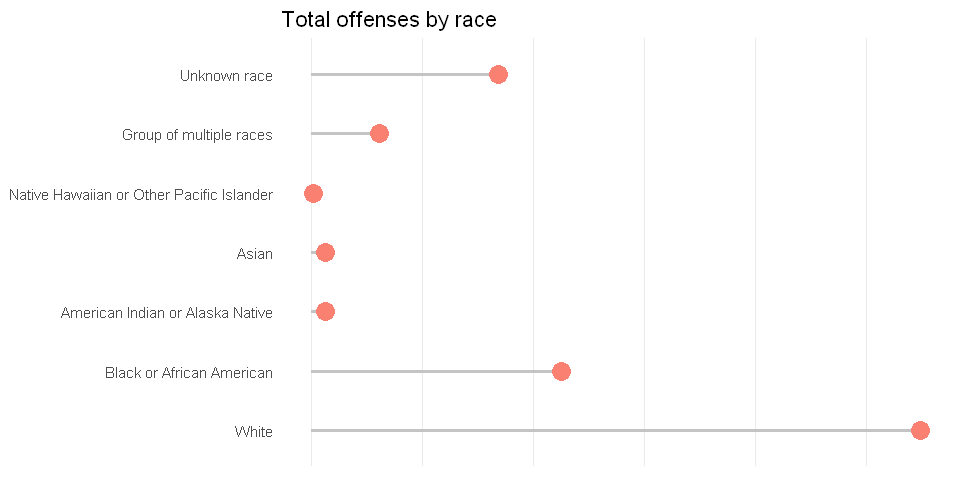

In [11]:
races.total <- races %>% group_by(race) %>% mutate(total = sum(value)) %>% select(total) %>% unique()
# races.total <- races %>% select(total) %>% unique()
races.total <- races.total %>% arrange(desc(total))

ggplot(races.total, aes(x = total, y = race)) + 
geom_segment(aes(x=0, xend = total, y=race, yend=race), size=1, alpha=0.9, color = 'gray', alpha = 0.6) +
geom_point(color = 'salmon', size = 5) +
theme_minimal() +
theme(panel.grid.major.y = element_blank(), 
      panel.grid.minor.y = element_blank(),
     axis.text.x = element_blank(), axis.title = element_blank()) +
labs(title = "Total offenses by race")

In [12]:
df.2 <- read.csv('./table_10_incidents_bias_motivation_by_location_2015.csv',
                 skip = 7, header=FALSE, stringsAsFactors = TRUE, dec = '.')
df.2 <- head(df.2 , -2)
head(df.2, 10)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
"incomplete final line found by readTableHeader on './table_10_incidents_bias_motivation_by_location_2015.csv'"

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
,,Race/ Ethnicity/ Ancestry,Religion,Sexual orientation,Disability,Gender,Gender Identity,NA,NA,NA
Total,"5,850","3,310","1,244","1,053",74,23,114,32,NA,NA
Abandoned/condemned structure,5,2,3,0,0,0,0,0,NA,NA
Air/bus/train terminal,82,57,9,15,0,0,0,1,NA,NA
Amusement park,1,1,0,0,0,0,0,0,NA,NA
Arena/stadium/fairgrounds/coliseum,7,4,1,1,0,0,1,0,NA,NA
ATM separate from bank,1,1,0,0,0,0,0,0,NA,NA
Auto dealership new/used,4,1,2,1,0,0,0,0,NA,NA
Bank/savings and loan,12,7,1,1,0,0,2,1,NA,NA
Bar/nightclub,99,55,9,32,0,0,3,0,NA,NA


In [13]:
rownames <- tail(df.2, -1) %>% select(V1)
colnames <- c("Location", "total.incidents", "Race/ Ethnicity/ Ancestry", "Religion", "Sexual orientation",
              "Disability", "Gender", 
              "Gender Identity", "Multiple-bias incidents")

tidy_df2 <- tail(df.2, -1)  %>% mutate_if(is.factor, convert) %>% mutate(V1 = rownames[, 1]) %>% select(-c(10, 11))
colnames(tidy_df2) <- colnames
tidy_df2

Warning message in convert(V1):
"в результате преобразования созданы NA"Warning message in convert(V3):
"в результате преобразования созданы NA"Warning message in convert(V4):
"в результате преобразования созданы NA"Warning message in convert(V5):
"в результате преобразования созданы NA"Warning message in convert(V6):
"в результате преобразования созданы NA"Warning message in convert(V7):
"в результате преобразования созданы NA"Warning message in convert(V8):
"в результате преобразования созданы NA"

Location,total.incidents,Race/ Ethnicity/ Ancestry,Religion,Sexual orientation,Disability,Gender,Gender Identity,Multiple-bias incidents
Total,5850,3310,1244,1053,74,23,114,32
Abandoned/condemned structure,5,2,3,0,0,0,0,0
Air/bus/train terminal,82,57,9,15,0,0,0,1
Amusement park,1,1,0,0,0,0,0,0
Arena/stadium/fairgrounds/coliseum,7,4,1,1,0,0,1,0
ATM separate from bank,1,1,0,0,0,0,0,0
Auto dealership new/used,4,1,2,1,0,0,0,0
Bank/savings and loan,12,7,1,1,0,0,2,1
Bar/nightclub,99,55,9,32,0,0,3,0
Camp/campground,3,1,2,0,0,0,0,0


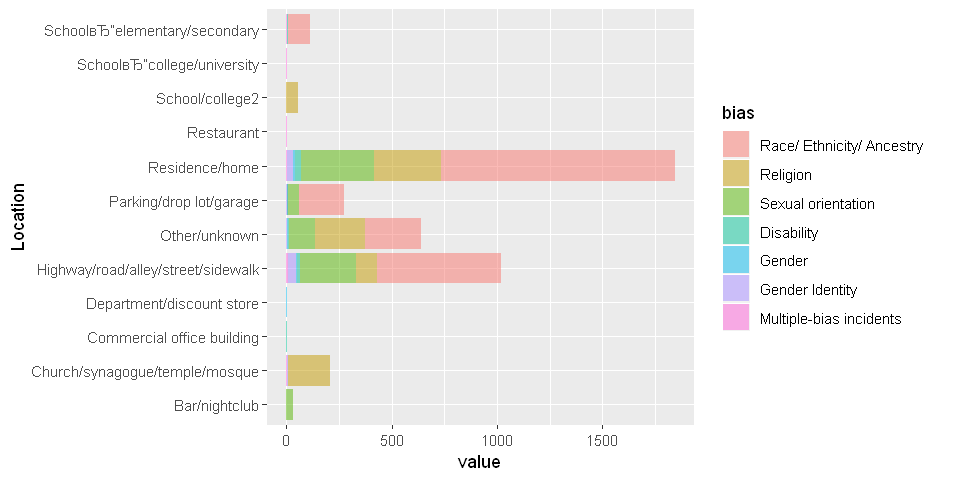

In [49]:
places <- tidy_df2 %>% select(-c(total.incidents))

places <- data.frame(places[1], stack(places[2:ncol(places)]))
colnames(places)[2:3] <- c('value', 'bias')

top5 <- places %>% filter(Location != "Total") %>% 
group_by(bias) %>% 
arrange(desc(value), .by_group = TRUE) %>% 
top_n(5, wt = value) 

ggplot(top5, aes(x=Location, y=value, fill=bias)) +
geom_bar(stat = "identity", alpha=0.5) + coord_flip()




# top5 <- top5[c("bias", "value", "Location")]
# edges <- top5 %>% select(-value) %>% as.data.frame()
# edges <- edges[c("bias", "Location")]
